In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

%matplotlib inline 
sns.set(style = "ticks")

## Read the dataset

In [310]:
air_data = pd.read_csv("airline_data.csv")

In [266]:
air_data.head(5)

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [269]:
#Get number of records and columns 
air_data.shape

(129880, 23)

In [36]:
#checking the info of all the columns
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [312]:
#dropping the unnecessary column
air_data = air_data.drop(columns = ['Unnamed: 0'])

In [38]:
air_data.head(5)

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Replacing column "satisfaction" values with 0 and 1 (neutral or dissatisfied = 0 and satisfied = 1)

In [313]:
air_data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)


C:\Users\A\AppData\Local\Temp\ipykernel_18348\1853769861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_data['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)


In [314]:
air_data.head(5)

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


## Checking the missing values


In [273]:
air_data.isna().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

## Missing value detection and treatment

In [274]:
air_data.arrival_delay_in_minutes.isna().sum()

393

In [240]:
#filling missing values with mean 
air_data['arrival_delay_in_minutes'] = air_data['arrival_delay_in_minutes'].fillna(air_data['arrival_delay_in_minutes'].mean())

In [241]:
air_data['arrival_delay_in_minutes'].isna().sum()

0

In [242]:
#check the missing values in data
air_data.isna().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [47]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

### Data Duplicacy : Check if there is duplicate data or not

In [275]:
#checking the duplicates in data
air_data.duplicated().sum()

0

## Splitting the data into categorical columns and numerical columns:

In [276]:
# Check the list of categorical variables
air_data.select_dtypes(include=['object']).columns

Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class',
       'satisfaction'],
      dtype='object')

In [277]:
air_data.select_dtypes(['object']).nunique()

Gender            2
customer_type     2
type_of_travel    2
customer_class    3
satisfaction      2
dtype: int64

In [278]:
#check the list of categorical variables
cat_var = air_data.dtypes[air_data.dtypes.values == 'O'].keys()

In [279]:
cat_data = air_data[cat_var]
cat_data

,Gender,customer_type,type_of_travel,customer_class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
129875,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
129876,Male,Loyal Customer,Business travel,Business,satisfied
129877,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
129878,Male,Loyal Customer,Business travel,Business,satisfied


In [316]:
#check the list of numerical variables
num_var = air_data.dtypes[((air_data.dtypes.values == 'int64') | (air_data.dtypes.values == 'float64'))].keys()

In [317]:
num_data = air_data[num_var]
num_data

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
129876,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
129877,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
129878,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


In [282]:
# Replace NaN with mode for categorical variables in data

air_data['Gender'] = air_data['Gender'].fillna(air_data['Gender'].mode()[0])
air_data['customer_type'] = air_data['customer_type'].fillna(air_data['customer_type'].mode()[0])
air_data['type_of_travel'] = air_data['type_of_travel'].fillna(air_data['type_of_travel'].mode()[0])
air_data['customer_class'] = air_data['customer_class'].fillna(air_data['customer_class'].mode()[0])



### Check the nature of dataset

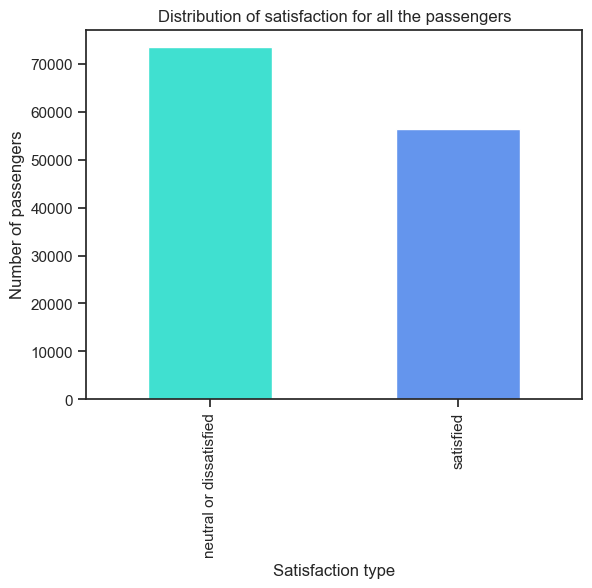

In [283]:
air_data.satisfaction.value_counts().plot(kind = 'bar', color = ['#40E0D0','#6495ED'])
plt.title("Distribution of satisfaction for all the passengers")
plt.ylabel("Number of passengers")
plt.xlabel("Satisfaction type")
plt.show()

The above plot shows a distribution of airline data between neutral/dissatisfied passengers indicated as 0 and satisfied passengers indicated as 1.
   So the data is quite balanced and it does not require any special resampling methods to be implemented.

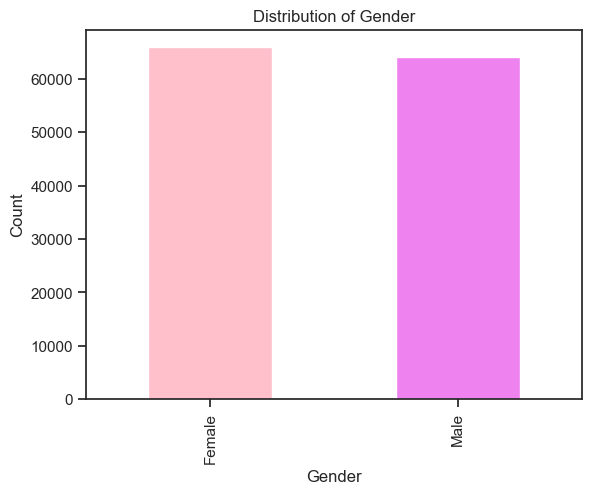

In [54]:
air_data.Gender.value_counts().plot(kind = 'bar', color = ['Pink','violet'])
plt.title("Distribution of Gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()

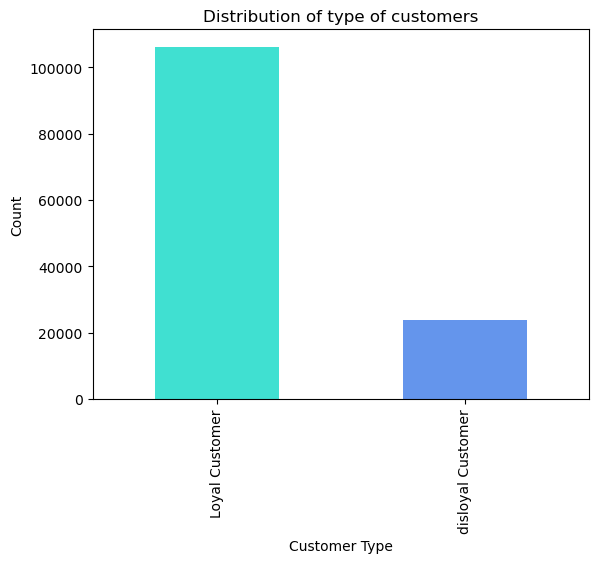

In [97]:
air_data.customer_type.value_counts().plot(kind = 'bar', color = ['#40E0D1','#6495EC'])
plt.title("Distribution of type of customers")
plt.ylabel("Count")
plt.xlabel("Customer Type")
plt.show()

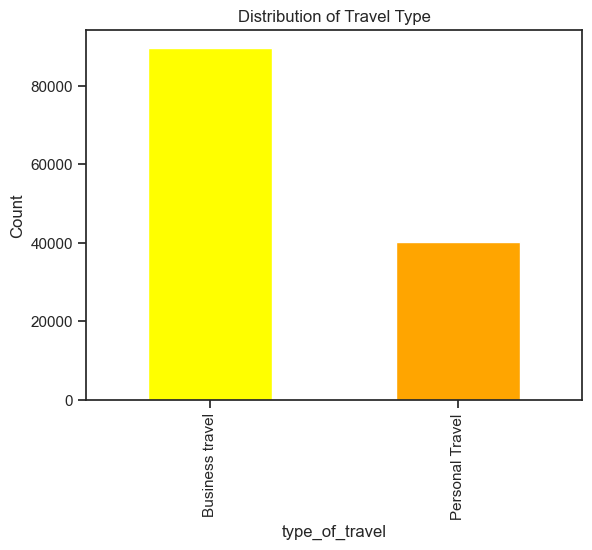

In [55]:
air_data.type_of_travel.value_counts().plot(kind = 'bar', color = ['yellow','orange'])
plt.title("Distribution of Travel Type")
plt.ylabel("Count")
plt.show()

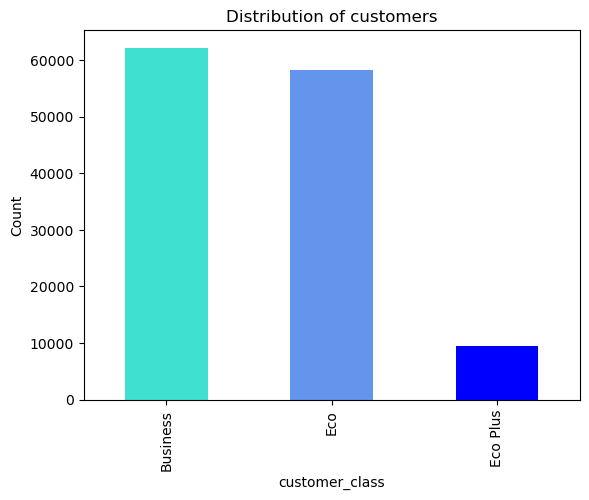

In [118]:
air_data.customer_class.value_counts().plot(kind = 'bar', color = ['#40E0D1','#6495EC','blue'])
plt.title("Distribution of customers")
plt.ylabel('Count')
plt.show()

In [130]:
cat_data.head(5)

,Gender,customer_type,type_of_travel,customer_class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business


In [284]:
num_data.head(5)

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


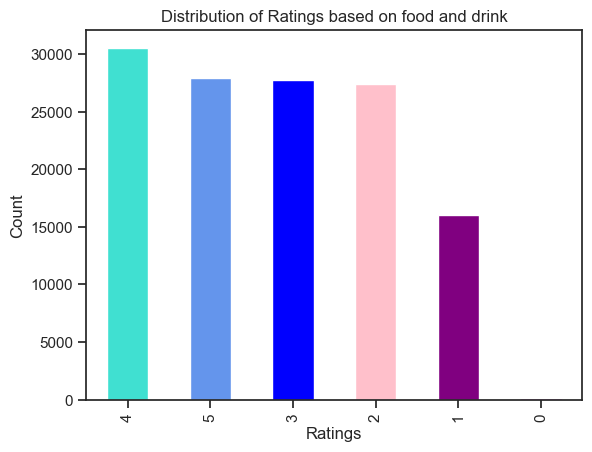

In [251]:
air_data.food_and_drink.value_counts().plot(kind = 'bar', color = ['#40E0D1','#6495EC','blue','pink','purple','violet'])
plt.title("Distribution of Ratings based on food and drink")
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [134]:
air_data.food_and_drink.nunique()

6

In [252]:
air_data.food_and_drink.value_counts()

food_and_drink
4    30563
5    27957
3    27794
2    27383
1    16051
0      132
Name: count, dtype: int64

In [318]:
num_data.corrwith(num_data.satisfaction).round(3)

age                                  0.134
flight_distance                      0.298
inflight_wifi_service                0.283
departure_arrival_time_convenient   -0.054
ease_of_online_booking               0.169
gate_location                       -0.003
food_and_drink                       0.211
online_boarding                      0.502
seat_comfort                         0.349
inflight_entertainment               0.398
onboard_service                      0.322
leg_room_service                     0.312
baggage_handling                     0.249
checkin_service                      0.237
inflight_service                     0.245
cleanliness                          0.307
departure_delay_in_minutes          -0.051
arrival_delay_in_minutes            -0.058
satisfaction                         1.000
dtype: float64

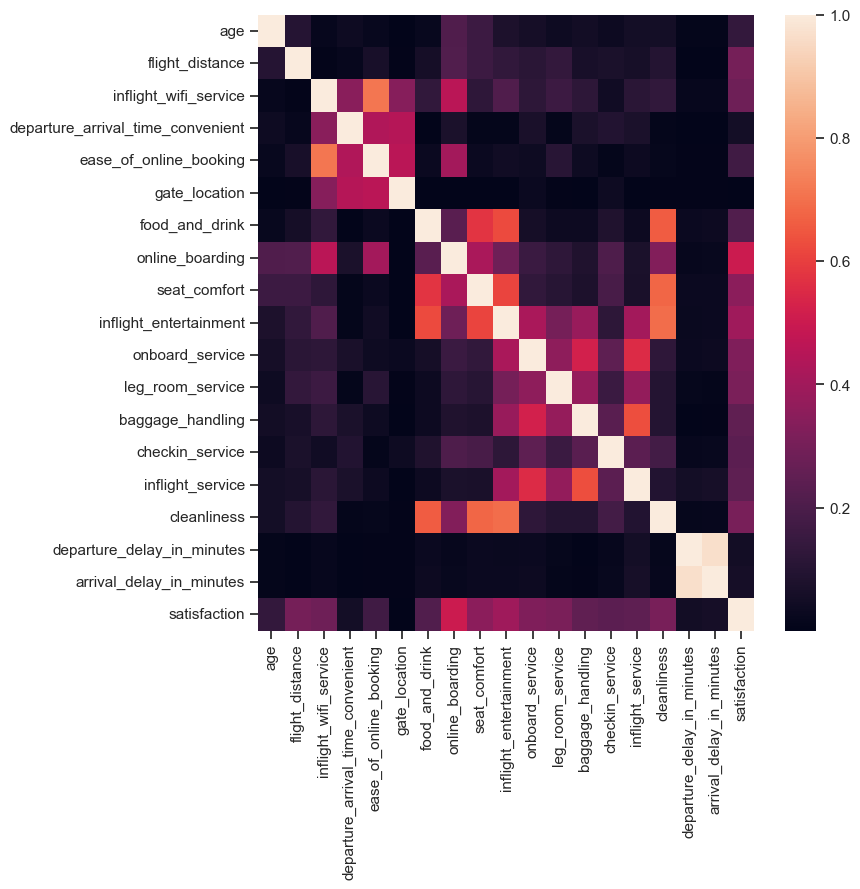

In [319]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (8,8))
sns.heatmap(num_data.corr().abs())
plt.show()

In [254]:
#check the cardinality of airline data
air_data.nunique()

Gender                                  2
customer_type                           2
age                                    75
type_of_travel                          2
customer_class                          3
flight_distance                      3821
inflight_wifi_service                   6
departure_arrival_time_convenient       6
ease_of_online_booking                  6
gate_location                           6
food_and_drink                          6
online_boarding                         6
seat_comfort                            6
inflight_entertainment                  6
onboard_service                         6
leg_room_service                        6
baggage_handling                        5
checkin_service                         6
inflight_service                        6
cleanliness                             6
departure_delay_in_minutes            466
arrival_delay_in_minutes              473
satisfaction                            2
dtype: int64

## OUTLIER TREATMENT

In [320]:
num_data.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [321]:
num_data.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,0.434463
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,0.495688
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


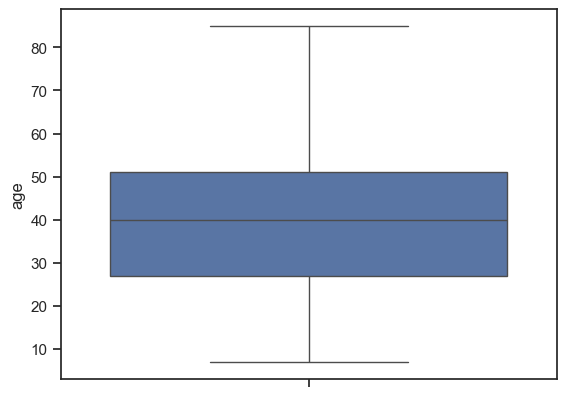

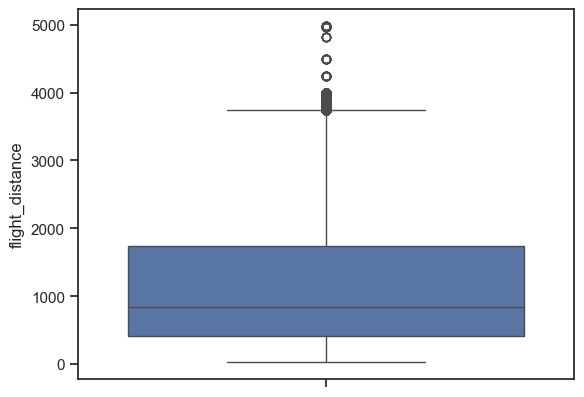

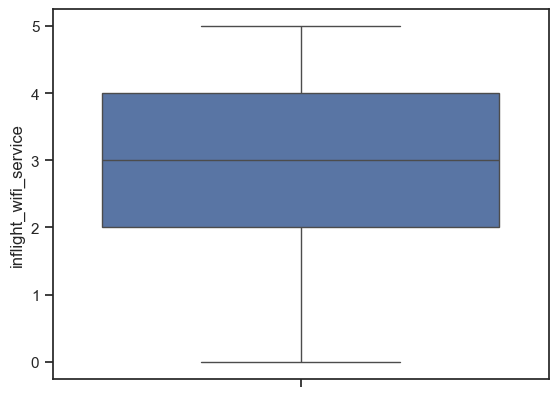

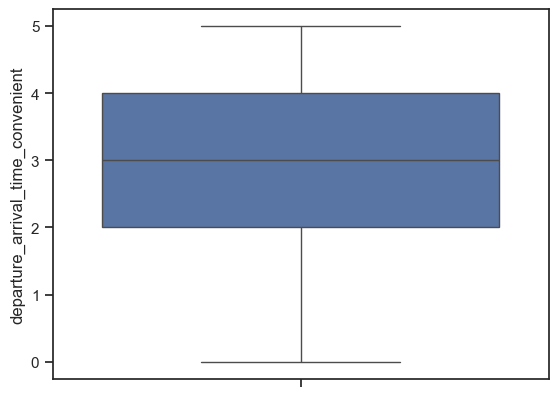

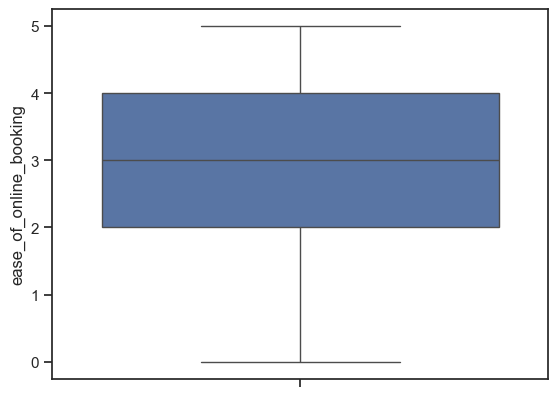

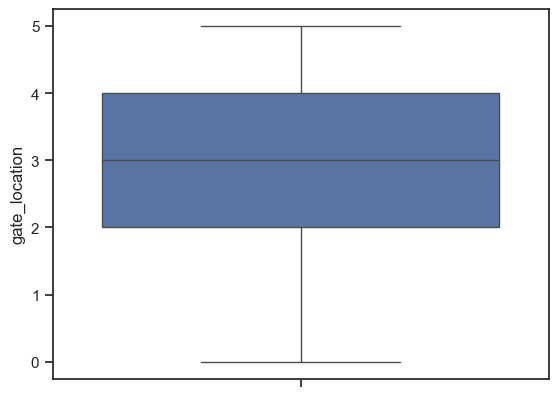

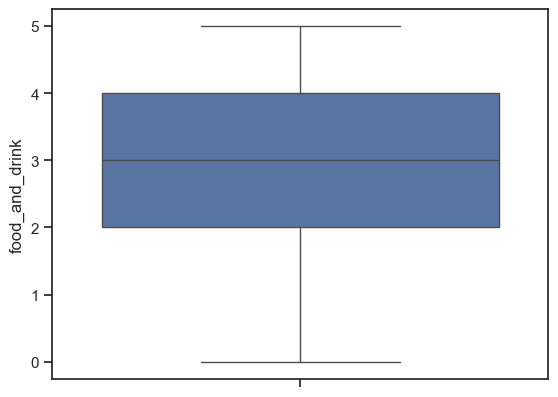

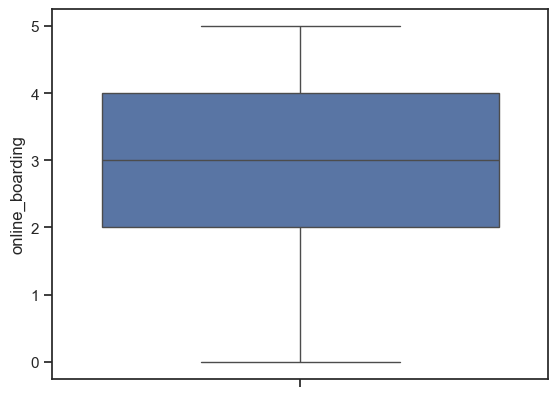

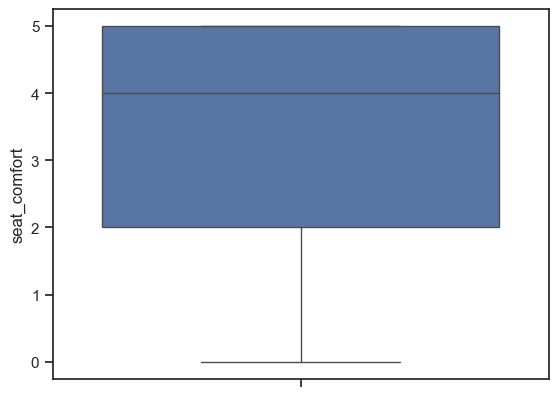

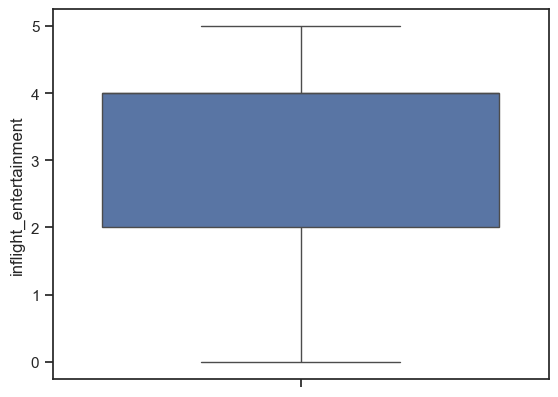

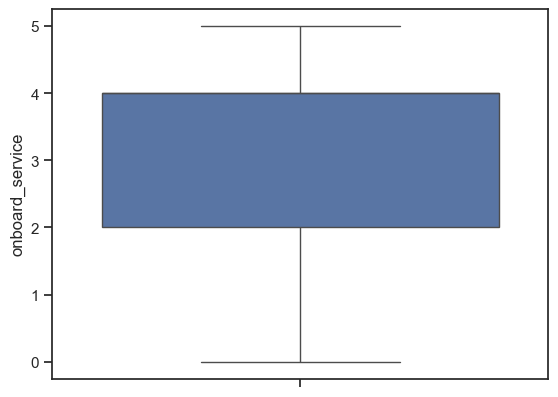

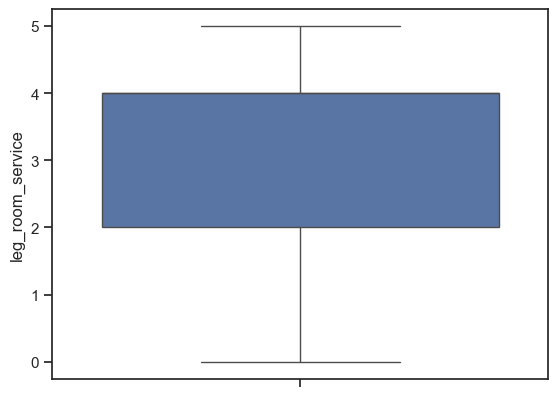

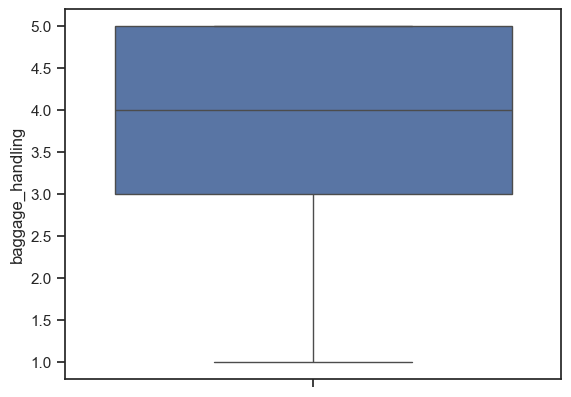

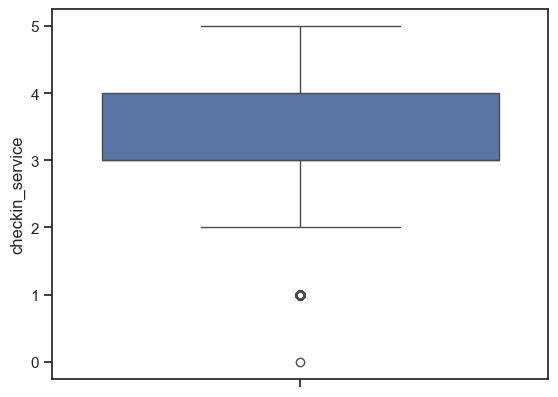

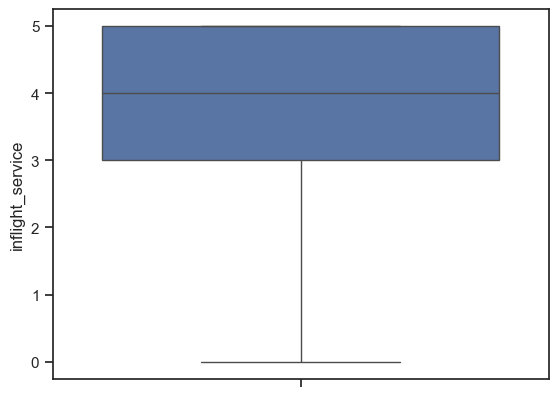

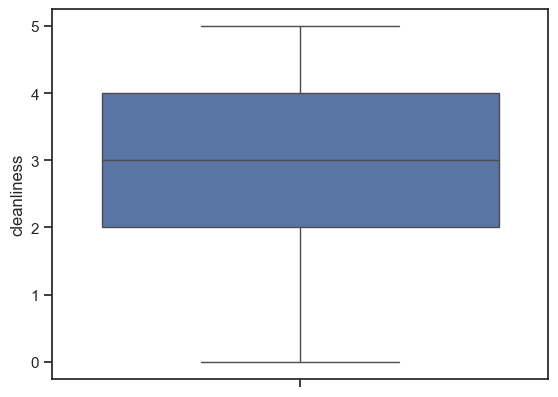

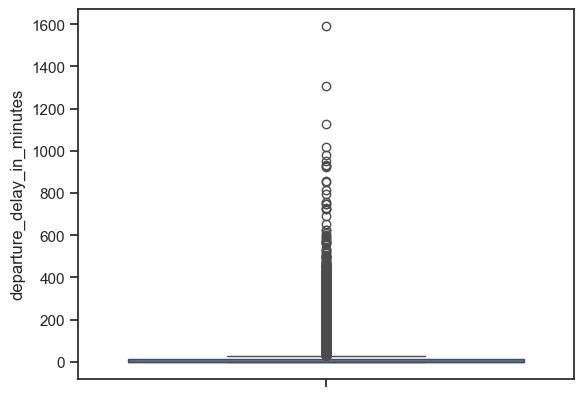

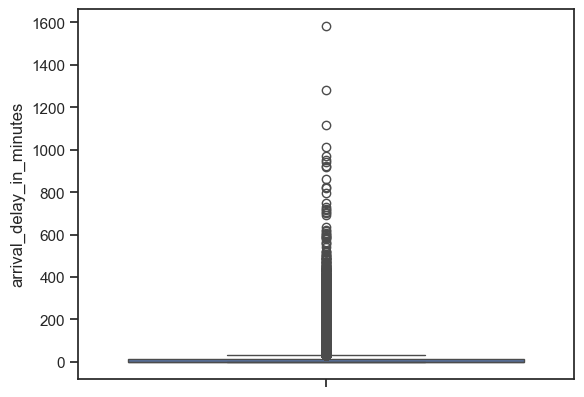

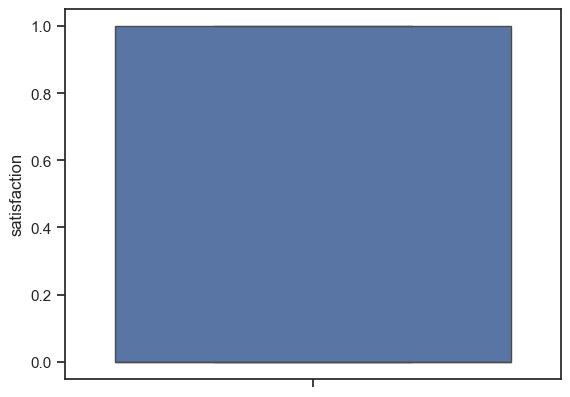

In [191]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

In [192]:
for columns in num_data.columns:
    q1 = num_data[columns].quantile(0.25)
    q3 = num_data[columns].quantile(0.75)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    num_data[columns] = num_data[columns].clip(lower = lc, upper = uc)
    

C:\Users\A\AppData\Local\Temp\ipykernel_18348\1592843241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[col] = num_data[col].clip(lower = lc, upper = uc)
C:\Users\A\AppData\Local\Temp\ipykernel_18348\1592843241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[col] = num_data[col].clip(lower = lc, upper = uc)
C:\Users\A\AppData\Local\Temp\ipykernel_18348\1592843241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

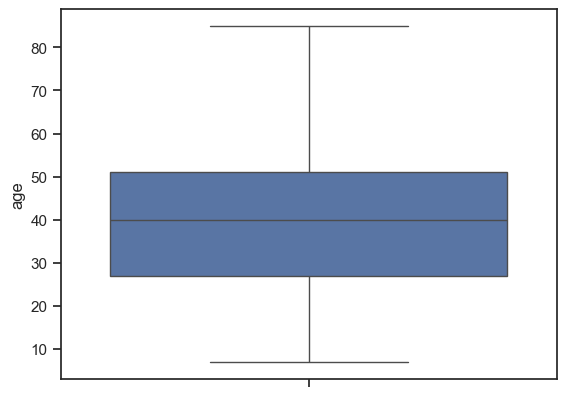

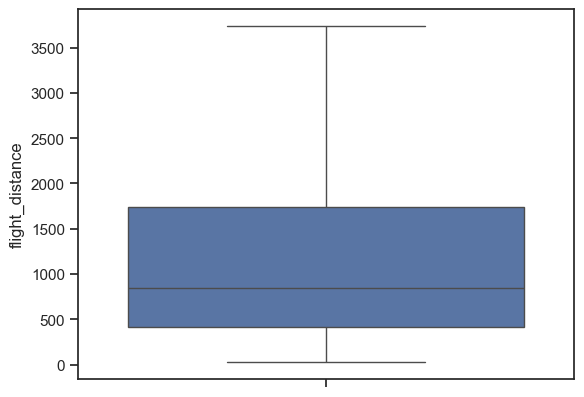

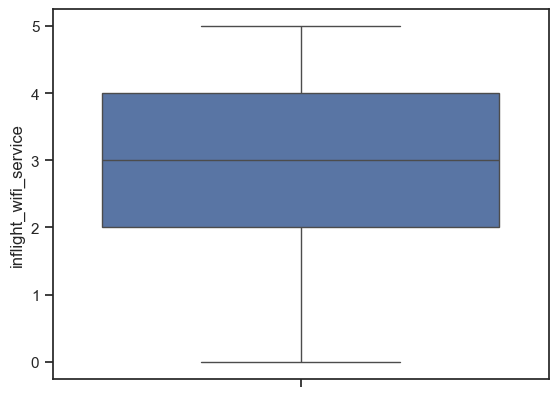

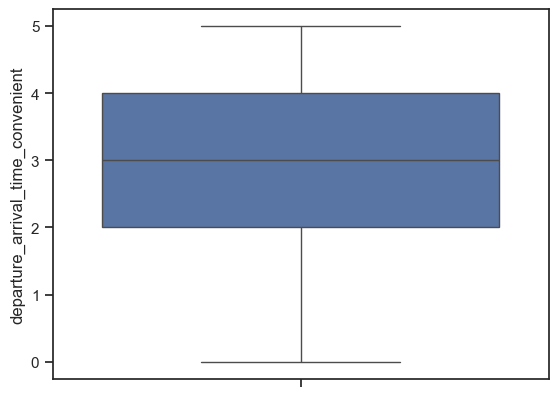

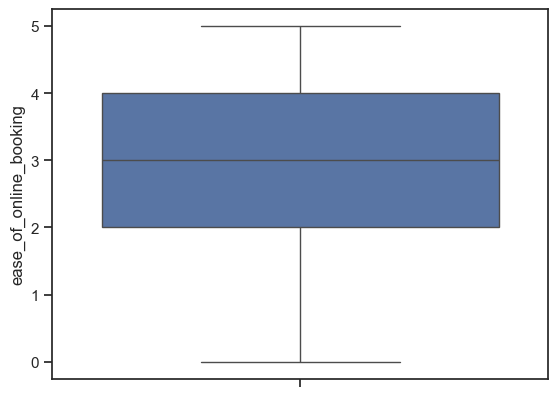

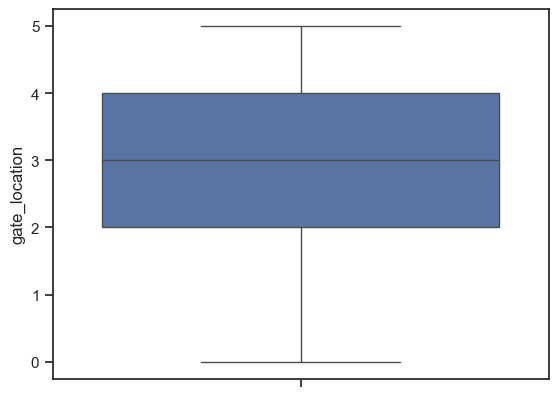

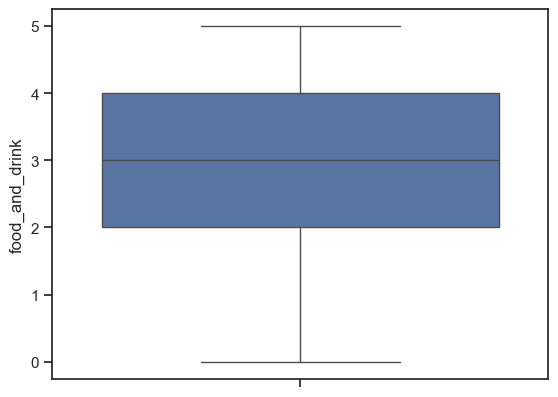

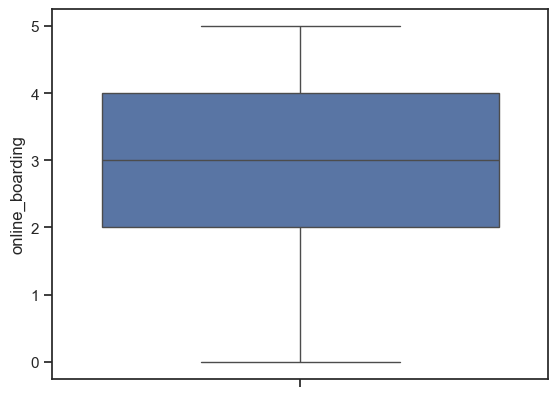

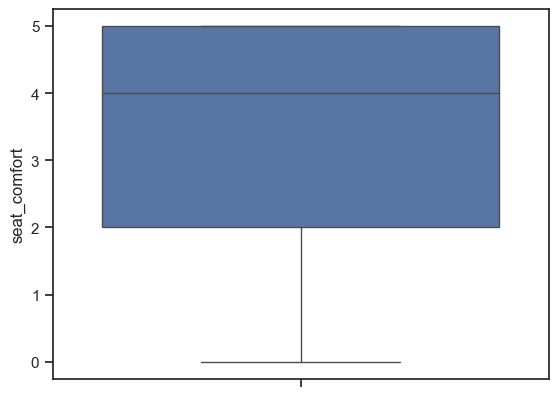

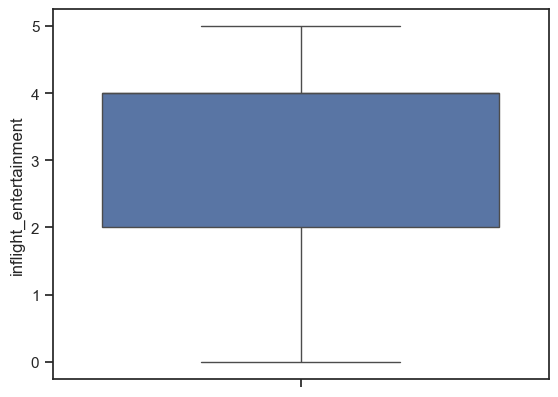

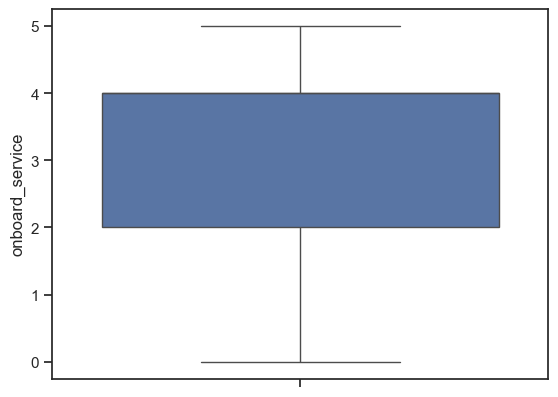

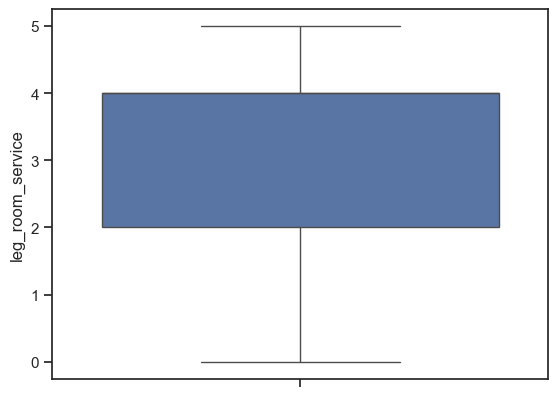

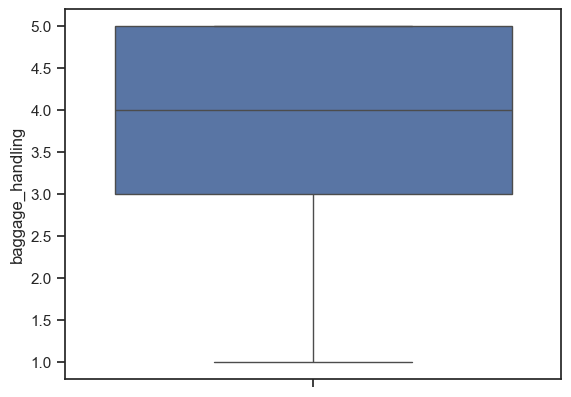

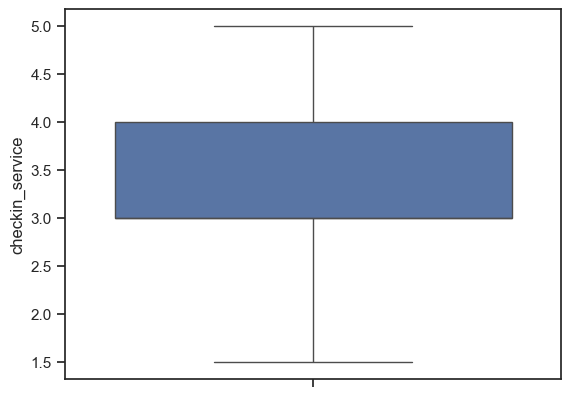

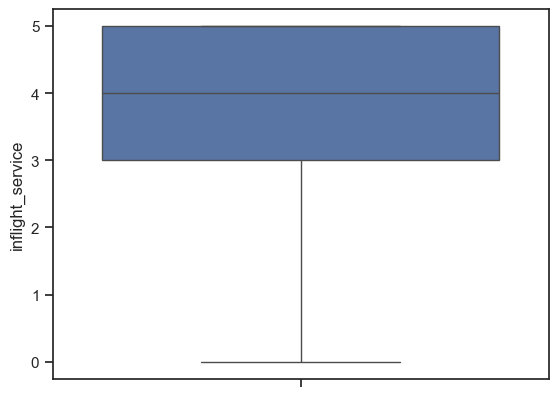

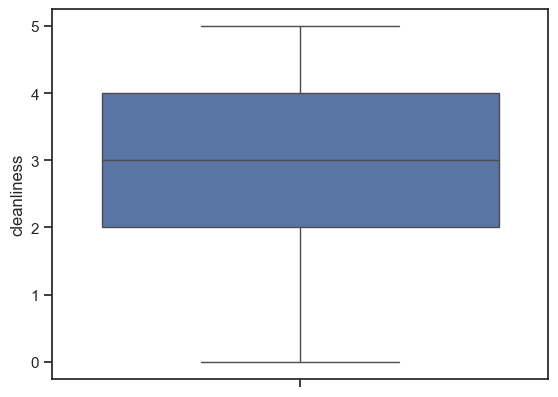

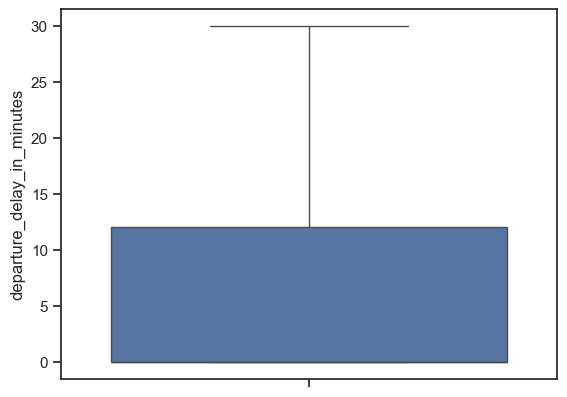

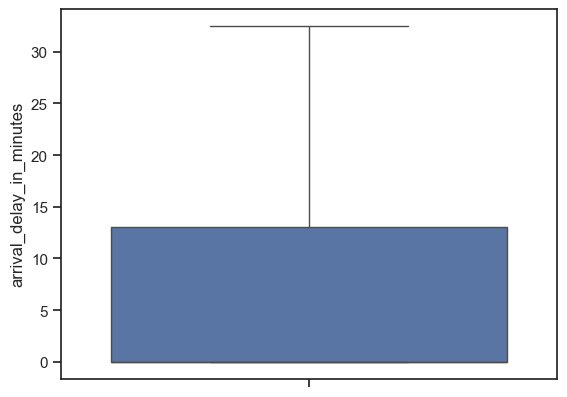

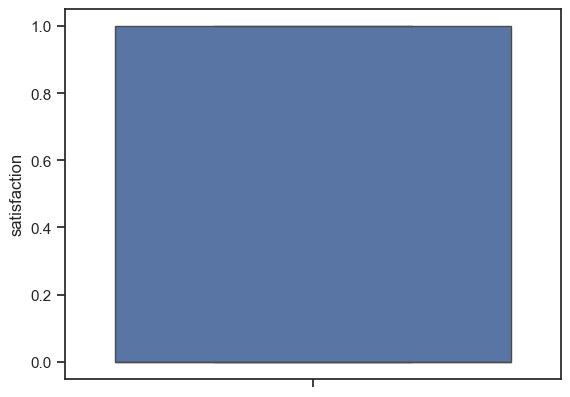

In [193]:
for i in num_data:
    sns.boxplot(num_data[i])
    plt.show()


# Splitting The datasets into train and test:

In [322]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [323]:
train, test = train_test_split(num_data,test_size = 0.3, random_state = 123)

In [324]:
num_data.shape

(129880, 19)

In [325]:
train.shape

(90916, 19)

In [326]:
test.shape

(38964, 19)

# Probability distribution of variables

In [327]:
num_data.columns

Index(['age', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

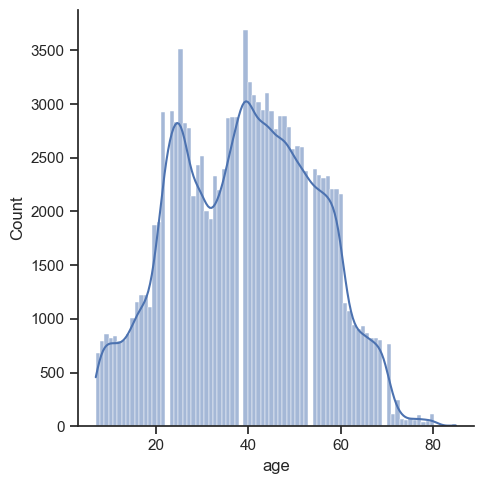

In [292]:
sns.displot(num_data.age, kde = True)

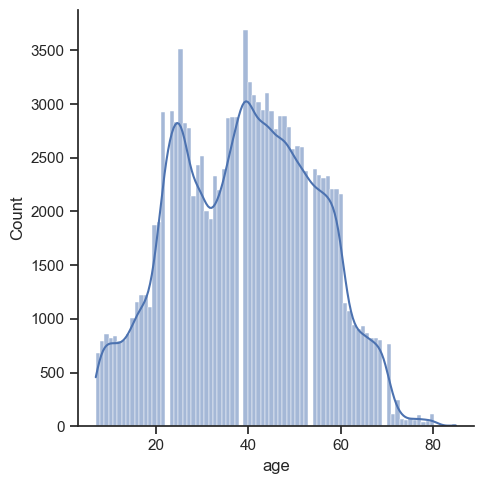

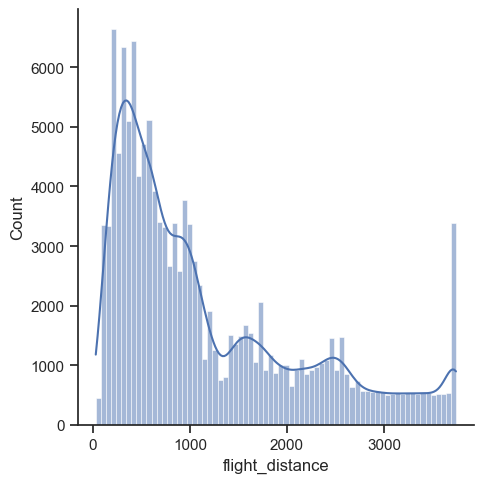

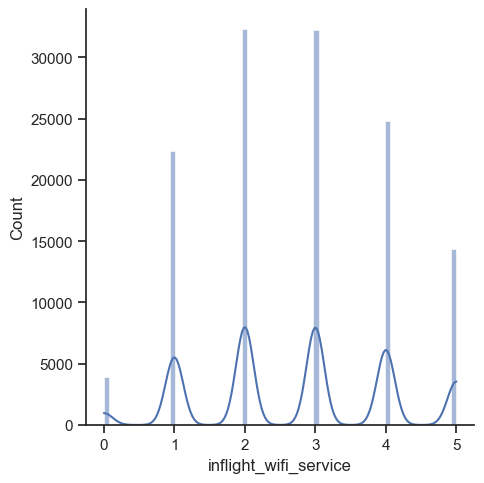

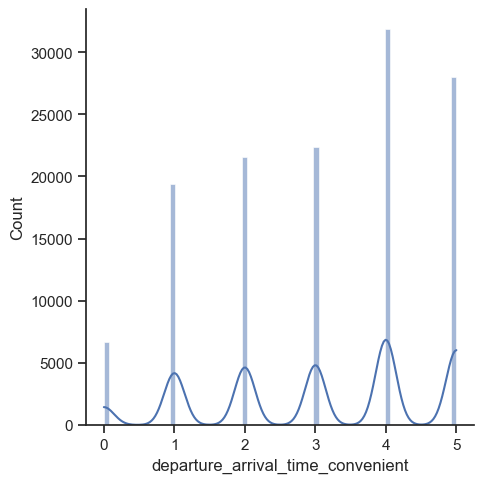

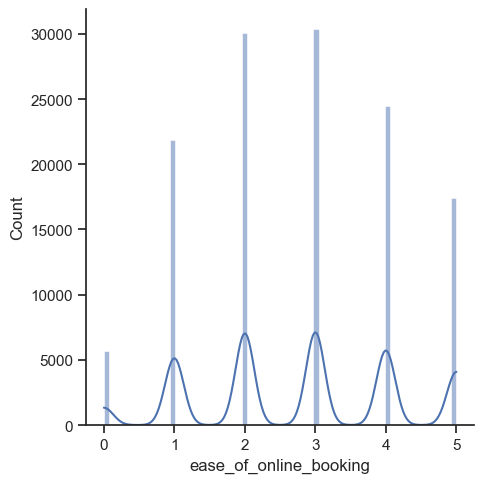

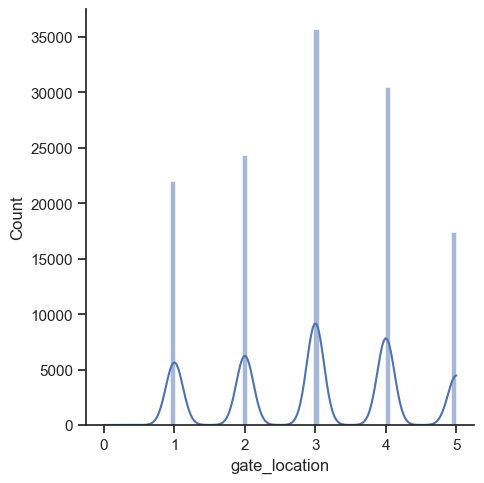

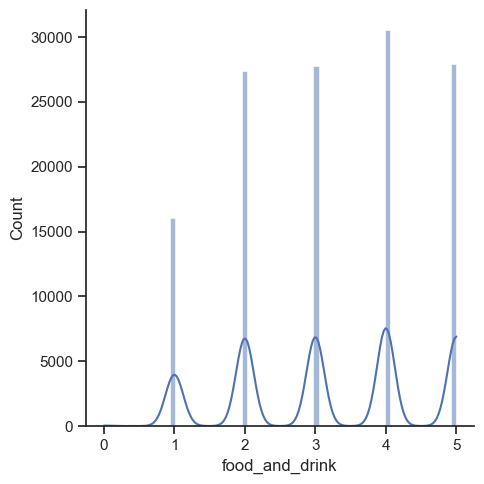

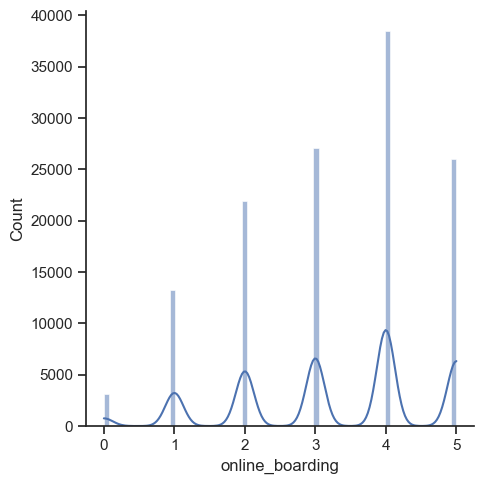

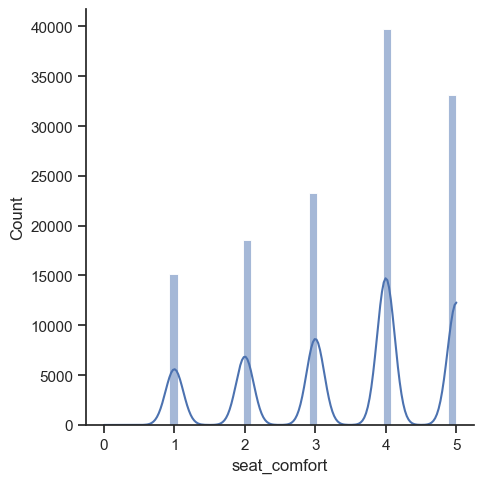

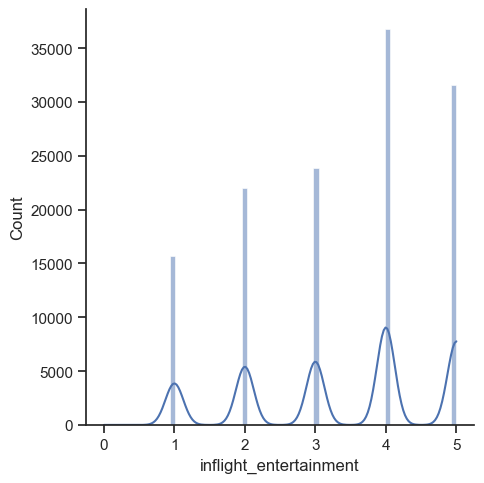

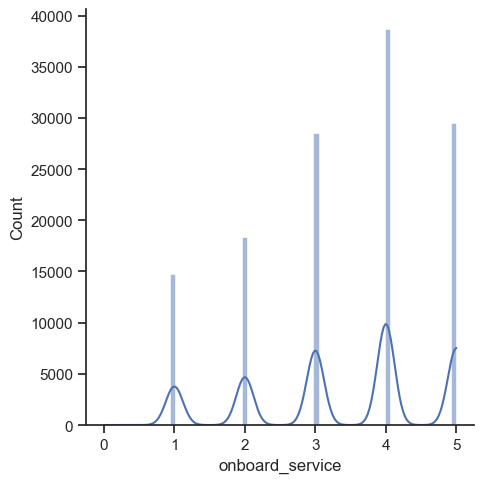

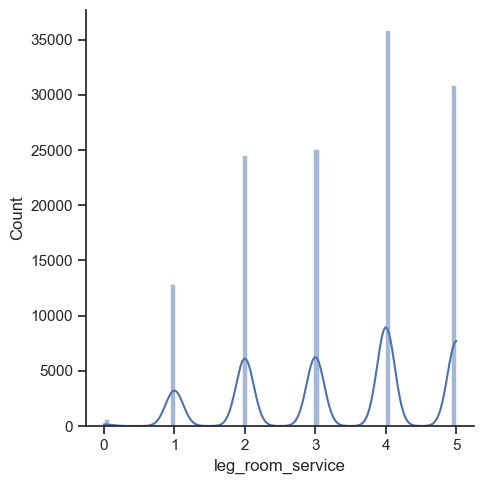

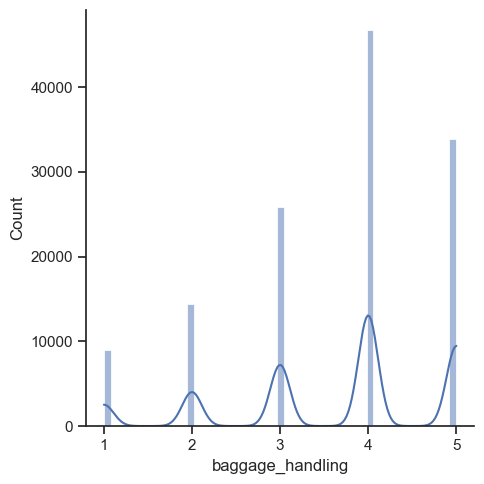

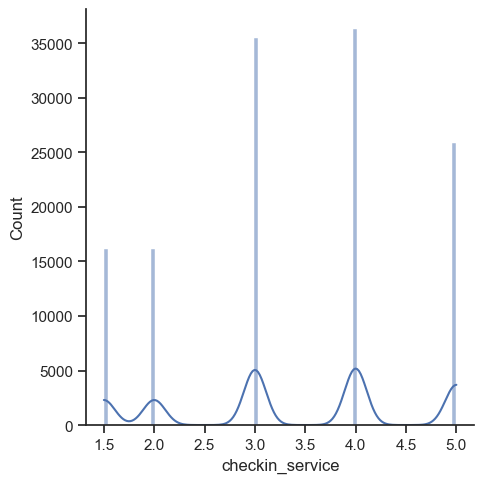

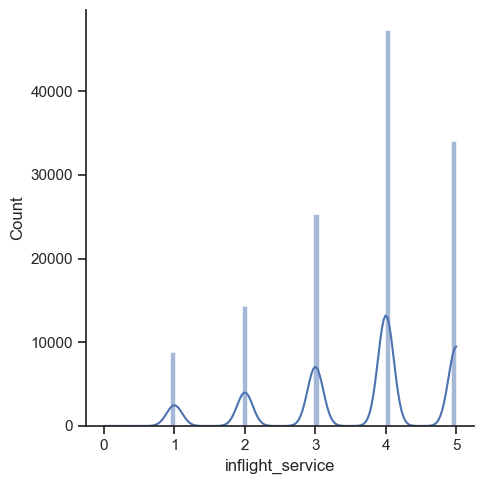

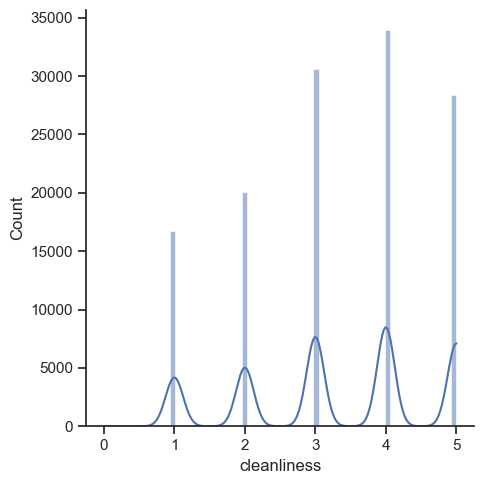

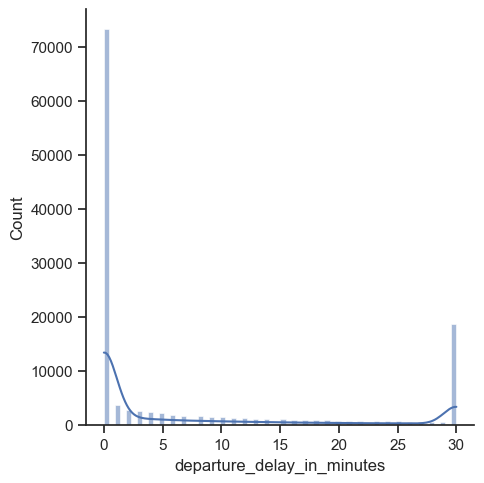

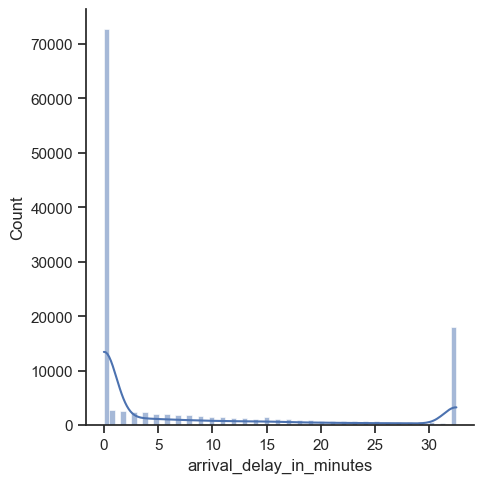

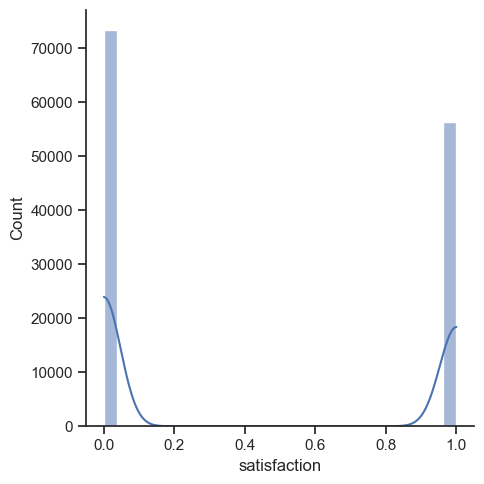

In [225]:
for i in num_data.columns:
    sns.displot(num_data[i], kde = True)

## Lets do Logorithemic Transformations

C:\Users\A\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\A\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\A\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\A\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\A\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\A\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

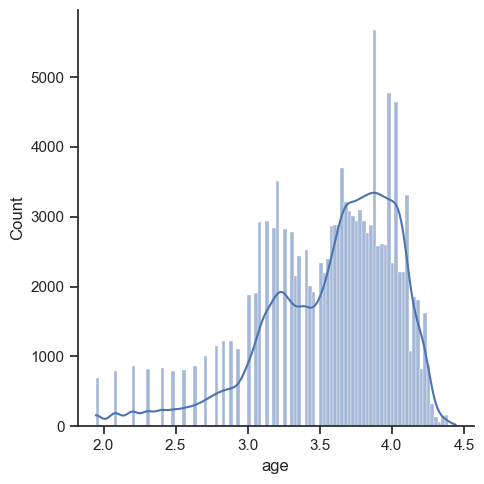

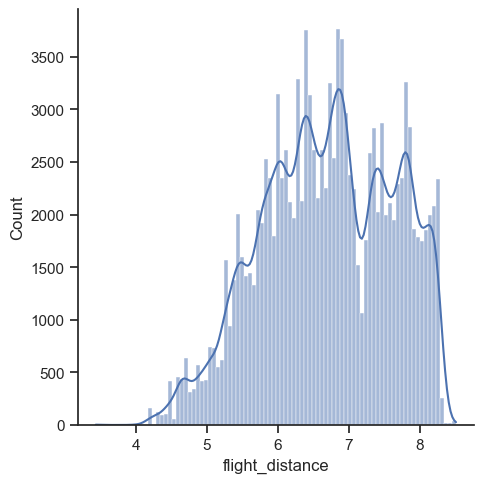

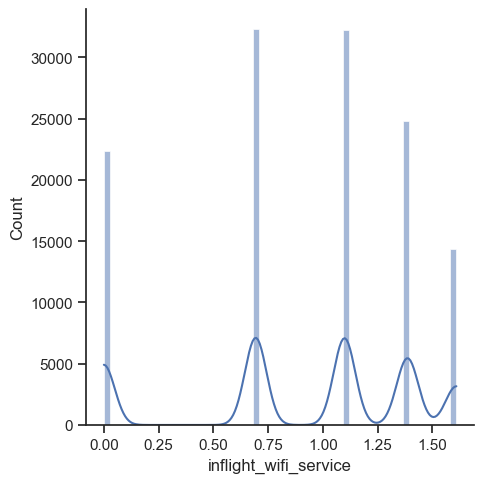

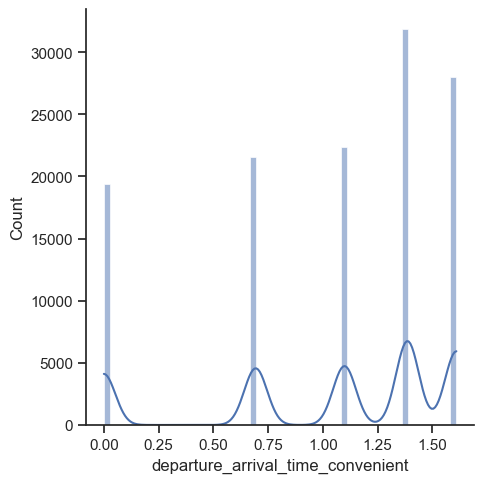

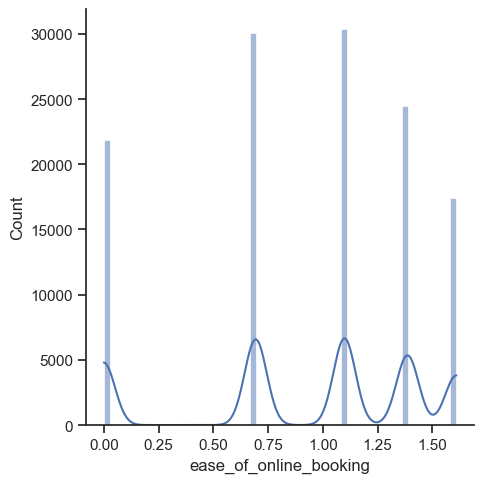

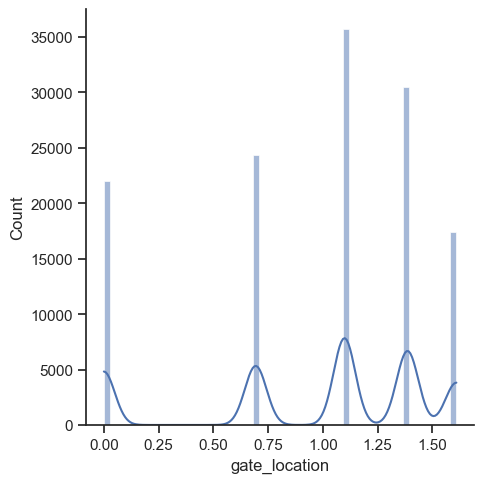

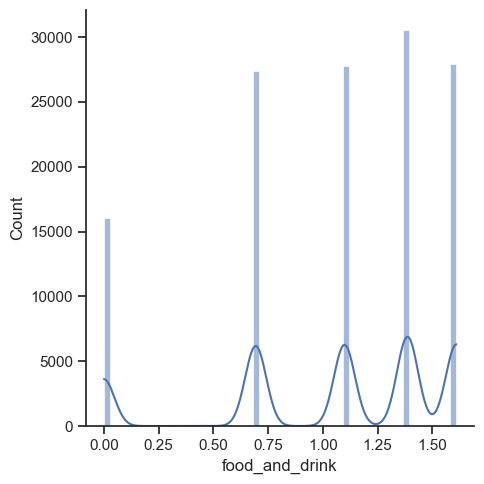

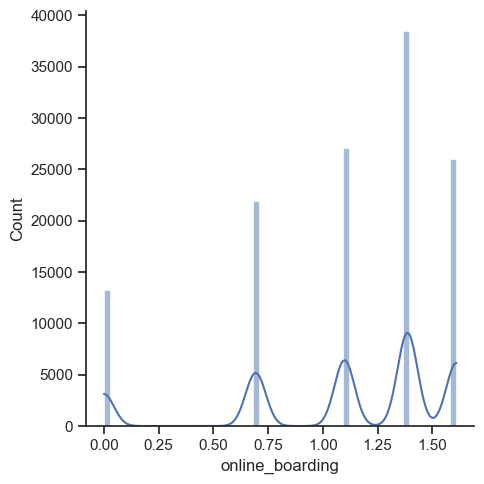

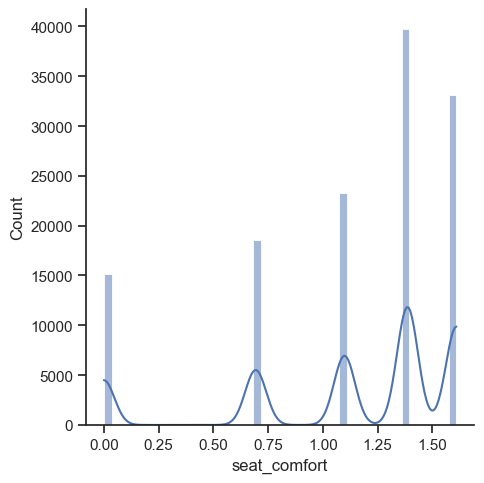

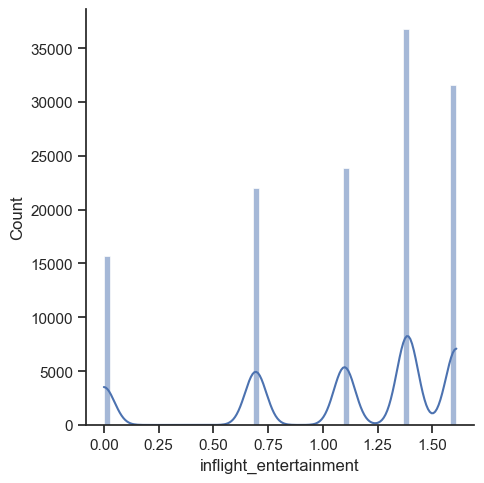

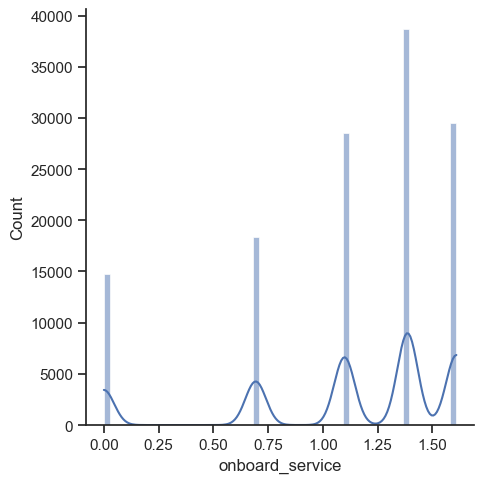

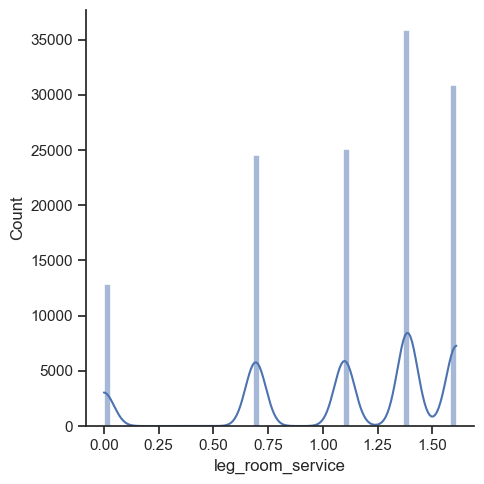

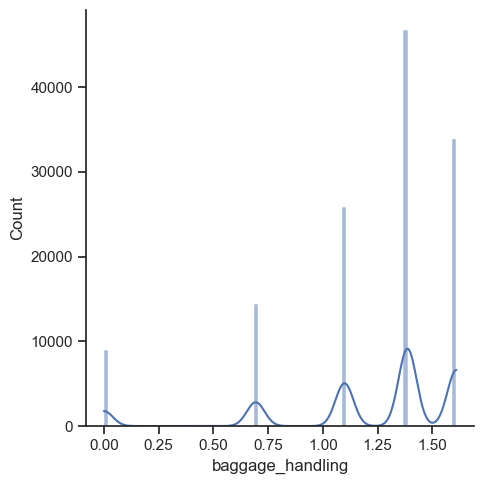

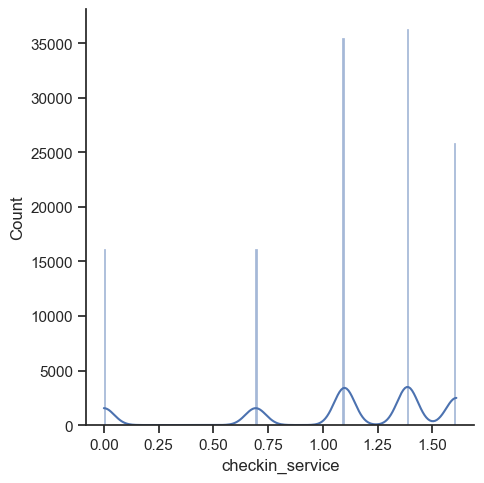

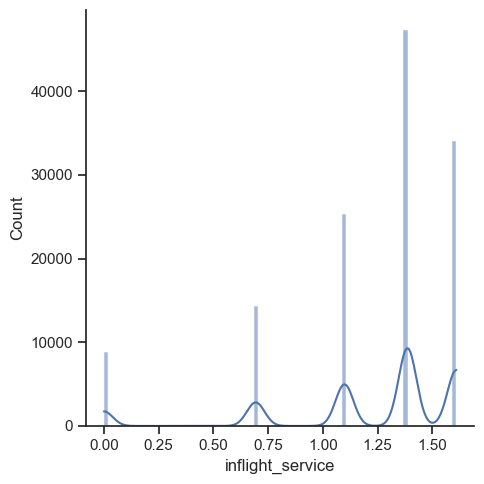

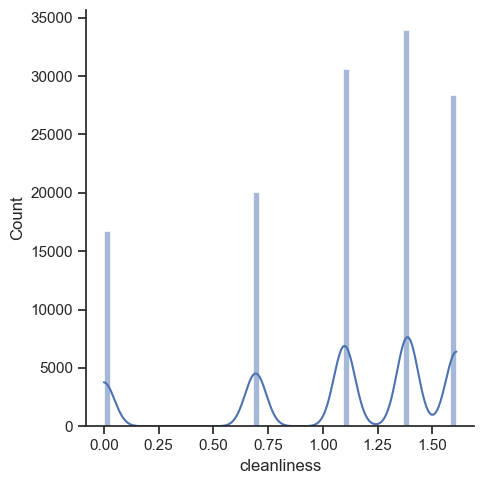

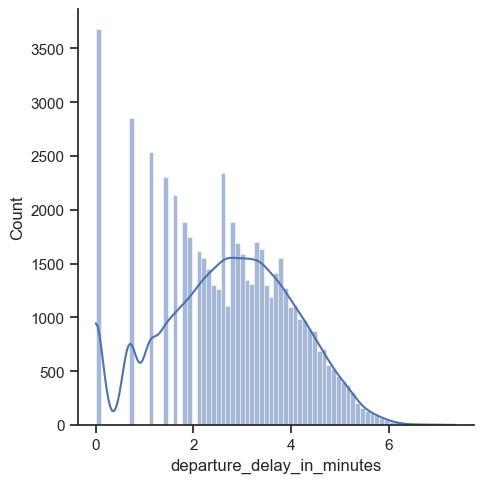

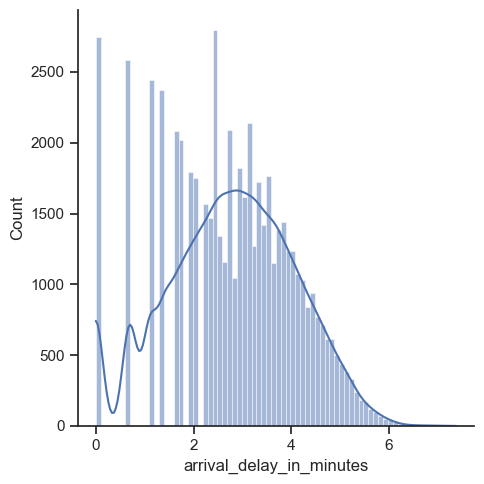

In [293]:
for i in num_data.columns:
    sns.displot(np.log(num_data[i]), kde = True)

## Logistic Regression

In [330]:
features = ['inflight_wifi_service','departure_arrival_time_convenient', 'ease_of_online_booking','gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort','inflight_entertainment', 'onboard_service', 'leg_room_service','baggage_handling', 'checkin_service', 'inflight_service','cleanliness']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()



In [334]:
formula = 'satisfaction~inflight_wifi_service+departure_arrival_time_convenient+ease_of_online_booking+gate_location+food_and_drink+online_boarding+seat_comfort+inflight_entertainment+onboard_service+leg_room_service+baggage_handling+checkin_service+inflight_service+cleanliness'

In [336]:
logit_model=smf.logit(formula, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.440687
         Iterations 7


In [337]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                90916
Model:                          Logit   Df Residuals:                    90901
Method:                           MLE   Df Model:                           14
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.3567
Time:                        14:41:59   Log-Likelihood:                -40065.
converged:                       True   LL-Null:                       -62279.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -7.6084      0.061   -124.958      0.000      -7.728      -7.489
inflight_wifi_service                 0.3171      0.011     29

In [338]:
pred= logit_model.predict(train)

In [340]:
check = pd.concat([train.satisfaction, pred], axis = 1)

In [341]:
check.shape

(90916, 2)

In [342]:
check.head(10)

,satisfaction,0
30233,0,0.070345
4460,1,0.539381
49963,0,0.300503
120612,1,0.730635
25321,0,0.043040
78364,0,0.180594
111585,1,0.751288
63397,1,0.251169
77916,0,0.320665
113138,0,0.168335


In [343]:
check = check.rename(columns = {0 : 'prediction'})

In [344]:
check.head(10)

,satisfaction,prediction
30233,0,0.070345
4460,1,0.539381
49963,0,0.300503
120612,1,0.730635
25321,0,0.043040
78364,0,0.180594
111585,1,0.751288
63397,1,0.251169
77916,0,0.320665
113138,0,0.168335


In [ ]:
# lets take cutoff = 0.3

In [346]:
check['pred_satisfaction'] = np.where(check.prediction >= 0.3, 1, 0)

In [347]:
check.head(15)

,satisfaction,prediction,pred_default,pred_satisfaction
30233,0,0.070345,0,0
4460,1,0.539381,1,1
49963,0,0.300503,1,1
120612,1,0.730635,1,1
25321,0,0.043040,0,0
78364,0,0.180594,0,0
111585,1,0.751288,1,1
63397,1,0.251169,0,0
77916,0,0.320665,1,1
113138,0,0.168335,0,0


In [350]:
check = check.drop(columns = ["pred_default"])

In [351]:
check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90916 entries, 30233 to 118270
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   satisfaction       90916 non-null  int64  
 1   prediction         90916 non-null  float64
 2   pred_satisfaction  90916 non-null  int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.4 MB


In [352]:
check['pred_satisfaction'] = check['pred_satisfaction'].astype('float')

In [ ]:
# build a confusion matrix 

In [353]:
pd.crosstab(index = check.satisfaction, columns = check.pred_satisfaction, margins = True)

pred_satisfaction,0.0,1.0,All
satisfaction,,,
0,34752,16495,51247
1,4934,34735,39669
All,39686,51230,90916


In [354]:
from sklearn import metrics

In [356]:
print(metrics.classification_report(check.satisfaction, check.pred_satisfaction))

              precision    recall  f1-score   support

           0       0.88      0.68      0.76     51247
           1       0.68      0.88      0.76     39669

    accuracy                           0.76     90916
   macro avg       0.78      0.78      0.76     90916
weighted avg       0.79      0.76      0.76     90916



In [357]:
pred_test = logit_model.predict(test)

In [358]:
pred

30233     0.070345
4460      0.539381
49963     0.300503
120612    0.730635
25321     0.043040
            ...   
61404     0.698723
17730     0.860347
28030     0.129795
15725     0.359712
118270    0.687449
Length: 90916, dtype: float64

In [364]:
check_test = pd.concat([test.satisfaction, pred_test], axis = 1)

In [369]:
check_test = check_test.rename(columns = {0 : 'test_prediction'})

In [370]:
check_test.head(10)

,satisfaction,test_prediction
28551,0,0.019377
64771,0,0.248517
86495,1,0.807188
113447,1,0.789309
123276,0,0.605401
103914,1,0.154900
115567,1,0.227013
83826,1,0.327698
17834,0,0.257234
107471,0,0.493928


In [ ]:
# lets take cutoff = 0.3

In [371]:
check_test['pred_satisfaction'] = np.where(check_test.test_prediction >= 0.3, 1, 0)

In [372]:
check_test.head(10)

,satisfaction,test_prediction,pred_satisfaction
28551,0,0.019377,0
64771,0,0.248517,0
86495,1,0.807188,1
113447,1,0.789309,1
123276,0,0.605401,1
103914,1,0.154900,0
115567,1,0.227013,0
83826,1,0.327698,1
17834,0,0.257234,0
107471,0,0.493928,1


In [373]:
check_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38964 entries, 28551 to 101003
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   satisfaction       38964 non-null  int64  
 1   test_prediction    38964 non-null  float64
 2   pred_satisfaction  38964 non-null  int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 1.0 MB


In [374]:
check_test['pred_satisfaction'] = check_test['pred_satisfaction'].astype('float')

In [ ]:
# build a confusion matrix 

In [375]:
pd.crosstab(index = check_test.satisfaction, columns = check_test.pred_satisfaction, margins = True)

pred_satisfaction,0.0,1.0,All
satisfaction,,,
0,14978,7227,22205
1,2163,14596,16759
All,17141,21823,38964


In [376]:
print(metrics.classification_report(check_test.satisfaction, check_test.pred_satisfaction))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76     22205
           1       0.67      0.87      0.76     16759

    accuracy                           0.76     38964
   macro avg       0.77      0.77      0.76     38964
weighted avg       0.79      0.76      0.76     38964



In [ ]:
#even after doing outlier treatment process and converting the variables to normal distribution :
#max training accuracy : 76%
#testing accuracy (before transformations : 78% , after transformations : 76%)

In [378]:
linear_data = num_data.loc[ : ,['satisfaction','inflight_service']]

In [379]:
linear_data

,satisfaction,inflight_service
0,0,5
1,0,4
2,1,4
3,0,4
4,1,3
...,...,...
129875,0,5
129876,1,5
129877,0,4
129878,1,5


## Linear Regression

In [ ]:
#Univariate analysis

In [380]:
ols_model = smf.ols('satisfaction~inflight_service',linear_data).fit()

In [381]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     8288.
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:12:29   Log-Likelihood:                -89123.
No. Observations:              129880   AIC:                         1.783e+05
Df Residuals:                  129878   BIC:                         1.783e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0587      0.004  

In [417]:
X = num_data.drop(['satisfaction'], axis=1)  #X = claims_1.drop(['fraudulent'],axis=1)

y = num_data['satisfaction']                 #y = Claims_1['fraudulent']

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [430]:
X_train.shape , X_test.shape

((90916, 18), (38964, 18))

In [432]:
X_train.dtypes

age                                    int64
flight_distance                        int64
inflight_wifi_service                  int64
departure_arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
dtype: object

In [421]:
X_train.isna().sum()

age                                    0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             273
dtype: int64

In [433]:
X_train.arrival_delay_in_minutes.isna().sum()

273

In [434]:
X_train['arrival_delay_in_minutes'] = X_train['arrival_delay_in_minutes'].fillna(X_train['arrival_delay_in_minutes'].mean())

In [435]:
X_train.arrival_delay_in_minutes.isna().sum()

0

In [425]:
cat_data

,Gender,customer_type,type_of_travel,customer_class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
129875,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
129876,Male,Loyal Customer,Business travel,Business,satisfied
129877,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
129878,Male,Loyal Customer,Business travel,Business,satisfied


In [436]:
X_train.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
13236,57,590,5,5,5,5,4,4,5,5,5,5,5,3,5,4,40,40.0
69839,49,3559,2,2,2,2,5,4,4,4,4,4,4,3,4,3,0,0.0
107468,35,590,4,1,1,1,4,4,4,4,3,2,2,5,4,4,33,15.0
49148,59,127,1,1,1,1,3,4,4,5,5,5,5,4,5,5,0,0.0
40165,55,1010,3,3,3,1,3,3,4,2,5,2,5,4,2,4,157,152.0


In [437]:
X_train.shape

(90916, 18)

In [438]:
X_train.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
13236,57,590,5,5,5,5,4,4,5,5,5,5,5,3,5,4,40,40.0
69839,49,3559,2,2,2,2,5,4,4,4,4,4,4,3,4,3,0,0.0
107468,35,590,4,1,1,1,4,4,4,4,3,2,2,5,4,4,33,15.0
49148,59,127,1,1,1,1,3,4,4,5,5,5,5,4,5,5,0,0.0
40165,55,1010,3,3,3,1,3,3,4,2,5,2,5,4,2,4,157,152.0


In [439]:
X_test.head()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
125669,11,56,3,2,3,4,2,3,2,2,2,3,3,3,3,2,73,76.0
90648,49,2674,3,3,3,3,4,4,4,4,4,4,4,4,4,3,0,0.0
45322,52,1797,4,3,3,3,4,4,4,4,3,5,4,4,4,4,7,7.0
64084,28,680,5,5,5,5,1,2,1,1,4,1,3,1,4,1,0,0.0
71595,54,333,4,2,1,1,3,1,2,4,4,1,5,1,4,3,0,0.0


In [440]:
X_test.shape

(38964, 18)

# Naive Bayes Model

In [441]:
from sklearn.naive_bayes import GaussianNB  #Gaussian distribution/Normal distribution,so you don't have to do any transformation to achieve normal distribution , it is done automatically by the GaussianNB().
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [442]:
y_train_pred = gnb.predict(X_train)

In [443]:
y_train_pred = pd.Series(y_train_pred)

In [444]:
y_train_pred

0        1
1        1
2        1
3        1
4        0
        ..
90911    1
90912    1
90913    1
90914    1
90915    0
Length: 90916, dtype: int64

In [448]:
Model_data_train = pd.DataFrame(y_train)

In [450]:
Model_data_train['y_pred'] = y_train_pred

In [451]:
Model_data_train

,satisfaction,y_pred
13236,1,1.0
69839,1,1.0
107468,1,NaN
49148,1,1.0
40165,0,0.0
...,...,...
45891,1,0.0
117952,1,NaN
42613,1,1.0
43567,0,0.0


In [453]:
pd.crosstab(Model_data_train.satisfaction,Model_data_train.y_pred, margins = True)

y_pred,0.0,1.0,All
satisfaction,,,
0,19091,16968,36059
1,14710,12970,27680
All,33801,29938,63739


In [454]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[40640 10781]
 [ 7539 31956]]

True Positives(TP) =  40640

True Negatives(TN) =  31956

False Positives(FP) =  10781

False Negatives(FN) =  7539


(2, 2)

<Axes: >

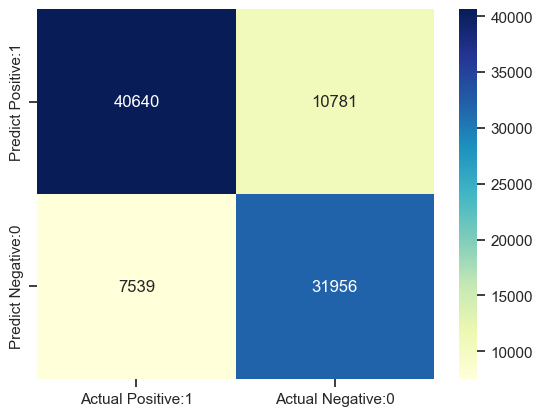

In [455]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [456]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82     51421
           1       0.75      0.81      0.78     39495

    accuracy                           0.80     90916
   macro avg       0.80      0.80      0.80     90916
weighted avg       0.80      0.80      0.80     90916



In [457]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score: 0.7985


# Data Validation on X_test

In [463]:
X_test.isna().sum()

age                                    0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             120
dtype: int64

In [464]:
X_test['arrival_delay_in_minutes'] = X_test['arrival_delay_in_minutes'].fillna(X_test['arrival_delay_in_minutes'].mean())

In [465]:
X_test['arrival_delay_in_minutes'].isna().sum()

0

In [466]:
y_test_pred = gnb.predict(X_test)

In [467]:
y_test_pred = pd.Series(y_test_pred)

In [468]:
print('Model test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))

Model test accuracy score: 0.8004


In [ ]:
pd.crosstab(Model_data_train.y,Model_data_train.prediction, margins = True)